In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [116]:
df_credit = pd.read_csv('fraud_risk_dataset.csv', header=0,index_col=0)
df_credit.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,1908,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,1908,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [3]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 1 to 19030
Columns: 2329 entries, portfolio_id to TSTU4908
dtypes: float64(836), int64(1493)
memory usage: 338.3 MB
None


In [4]:
print(df_credit.nunique())

portfolio_id                 17
product_term_credit_limit     4
NP                            2
cash_intent                   2
ALJ0300                      30
                             ..
TSTU3907                     12
TSTU3908                     12
TSTU4906                      6
TSTU4907                     20
TSTU4908                     20
Length: 2329, dtype: int64


In [5]:
df_credit.shape

(19030, 2329)

In [6]:
df_numeric = df_credit.drop(['portfolio_id', "product_term_credit_limit","cash_intent" ], axis = 1)

In [7]:
df_new = df_numeric.dropna()

In [8]:
df_new.head()

,NP,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,ALJ5820,ALJ5830,ALJ8120,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,1,33521,50283,0,698,698,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,98,98,999999998,999999998,999999998,999999998,999999998,9998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,0,1,0,0,999999997,999999997,999999997,999999997,999999997,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,98,98,999999998,999999998,999999998,999999998,999999998,9998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,0,2,0,0,999999997,999999997,999999997,999999997,999999997,65,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [9]:
df_new.shape

(19028, 2326)

## The first method

#### Firstly, use correlation matix to drop those variables with correlation greater than 0.9. There are 1881 features with correlation greater than 0.9. Then we reduce features from 2326 to 445. 

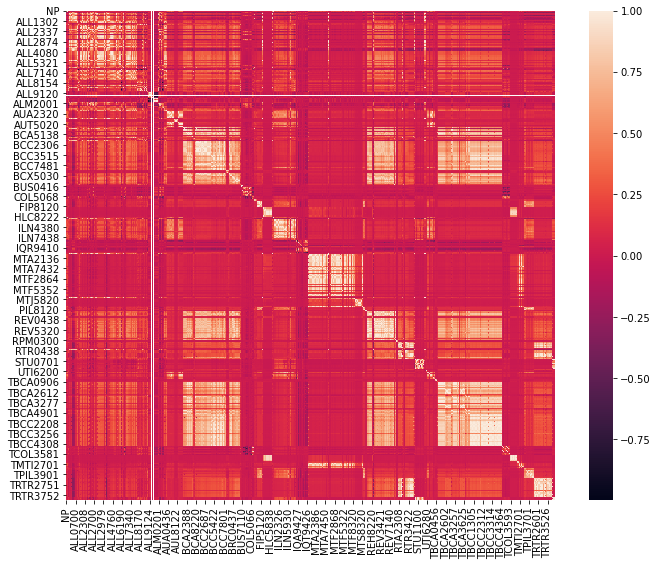

In [10]:
import seaborn as sns
#correlation matrix
corrval_all = df_new.corr()
visual = plt.figure(figsize = (12,9))

sns.heatmap(corrval_all,  vmax = 1, square = True)
plt.savefig("reduced_corr_graph.png")

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features_all = correlation(df_new, 0.90)
len(set(corr_features_all))

1881

In [13]:
#corr_features_all

In [14]:
df_after_correlation_matrix = df_new.drop(corr_features_all, axis = 1)
df_after_correlation_matrix.shape

(19028, 445)

#### we continue on reducing features using F-value and p-value.

In [15]:
df_after_correlation_matrix.head(5)

,NP,ALJ0300,ALJ0316,ALJ5030,ALL0000,ALL0060,ALL0061,ALL0201,ALL0216,ALL0316,...,TPIL3901,TPIL4709,TPIL4901,TRTR1203,TRTR2203,TRTR3203,TRTR3401,TRTR3403,TRTR4203,TSTU0909
record_nb,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,33521,13,96,96,0,7,7,...,0.0,97.0,0.0,520.0,199.0,-562.0,8.0,5.0,-2239.0,95.0
2,0,0,98,999999998,21,2,7,0,11,7,...,0.0,97.0,0.0,999999997.0,999999997.0,999999997.0,97.0,97.0,999999997.0,98.0
3,0,1,0,999999997,32,3,25,0,26,24,...,97.0,97.0,97.0,-104.0,-389.0,293.0,96.0,8.0,1428.0,95.0
4,0,0,98,999999998,39,0,0,0,0,0,...,97.0,97.0,0.0,999999997.0,999999997.0,999999997.0,97.0,97.0,999999997.0,98.0
5,0,2,0,999999997,7,1,1,0,1,1,...,98.0,98.0,98.0,999999998.0,999999998.0,999999998.0,98.0,98.0,999999998.0,98.0


In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

In [17]:
dataset_445 = df_after_correlation_matrix.values

In [18]:
X = dataset_445[:, 1:]
y = dataset_445[:,0]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
f_values, p_values = f_regression(X, y)

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [21]:
print(len(f_values))
print(len(p_values))

444
444


In [22]:
feature_names_445 = np.array(df_after_correlation_matrix.drop(["NP"], axis = 1).columns)

In [23]:
feature_names_445

array(['ALJ0300', 'ALJ0316', 'ALJ5030', 'ALL0000', 'ALL0060', 'ALL0061',
       'ALL0201', 'ALL0216', 'ALL0316', 'ALL0700', 'ALL1360', 'ALL1380',
       'ALL2001', 'ALL2002', 'ALL2003', 'ALL2004', 'ALL2005', 'ALL2006',
       'ALL2011', 'ALL2012', 'ALL2120', 'ALL2126', 'ALL2220', 'ALL2308',
       'ALL2327', 'ALL2328', 'ALL2390', 'ALL2490', 'ALL4520', 'ALL4980',
       'ALL5020', 'ALL5301', 'ALL5360', 'ALL6100', 'ALL6120', 'ALL6160',
       'ALL6203', 'ALL6210', 'ALL6220', 'ALL6230', 'ALL6250', 'ALL6270',
       'ALL6280', 'ALL6310', 'ALL6400', 'ALL6460', 'ALL6500', 'ALL6700',
       'ALL6970', 'ALL6980', 'ALL7113', 'ALL7115', 'ALL7116', 'ALL7140',
       'ALL7334', 'ALL7348', 'ALL8026', 'ALL8107', 'ALL8110', 'ALL8123',
       'ALL8150', 'ALL8151', 'ALL8153', 'ALL8154', 'ALL8157', 'ALL8162',
       'ALL8163', 'ALL8164', 'ALL8171', 'ALL8172', 'ALL8221', 'ALL8223',
       'ALL8250', 'ALL8253', 'ALL8257', 'ALL8723', 'ALL8725', 'ALL8726',
       'ALL8800', 'ALL9110', 'ALL9118', 'ALL9121', 

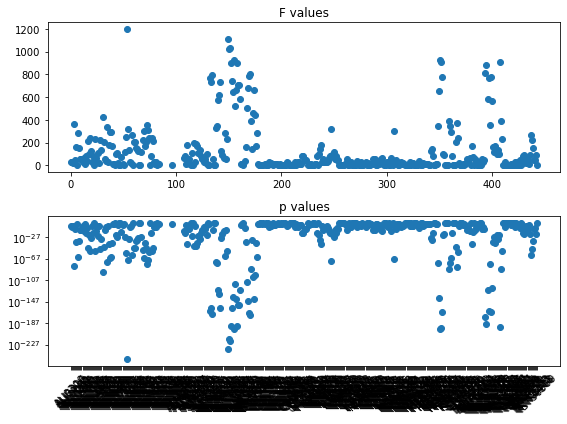

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(8,6))
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(feature_names_445, rotation=45);
fig.tight_layout()

#### Build a new DataFrame, columns: features, f_value, and p_value for the 444 features

In [25]:
df_features_444 = pd.DataFrame(data = feature_names_445, columns = ["Features"])

In [26]:
df_features_444["f_value"] = f_values
df_features_444 ["p_value"] = p_values

In [27]:
df_features_444

,Features,f_value,p_value
0,ALJ0300,25.645615,4.140587e-07
1,ALJ0316,33.279913,8.104115e-09
2,ALJ5030,20.874491,4.934613e-06
3,ALL0000,367.047018,4.768321e-81
4,ALL0060,51.516036,7.362879e-13
...,...,...,...
439,TRTR3203,150.814302,1.555247e-34
440,TRTR3401,46.635067,8.809790e-12
441,TRTR3403,44.610146,2.470891e-11
442,TRTR4203,95.385491,1.769668e-22


##### Visualize the 444 features' f_value and p_value, and looking for those with high f_value and low_p_value

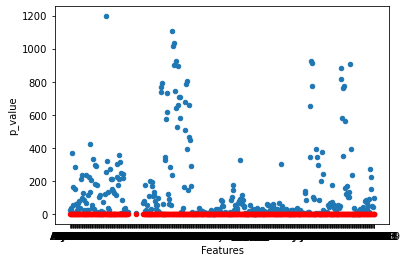

In [28]:
ax = plt.gca()

df_features_444.plot(kind='scatter',x='Features',y='f_value',ax=ax)
df_features_444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
#plt.ylim(1e-10,2e3)
plt.show()

#### select top 15% features with highest f_value, and with the lowest p_value. Finally, we got 64 features.

In [29]:
df_selected_features_from444 = df_features_444[(df_features_444['f_value'] >= df_features_444.f_value.quantile(0.85)) & (df_features_444['p_value'] <= df_features_444.p_value.quantile(0.15))]

In [30]:
len(df_selected_features_from444)

64

In [31]:
df_selected_features_from444

,Features,f_value,p_value
3,ALL0000,367.047018,4.768321e-81
7,ALL0216,286.200447,9.783524e-64
30,ALL5020,420.532077,1.866130e-92
34,ALL6120,333.827221,6.047880e-74
37,ALL6210,296.712633,5.427275e-66
...,...,...,...
399,TBCA2601,772.451521,1.111570e-166
400,TBCA2606,562.735979,1.282431e-122
408,TBCC1203,908.800610,4.540283e-195
409,TBCC3203,392.608306,1.667959e-86


#### visualize the f_values of the 64 features

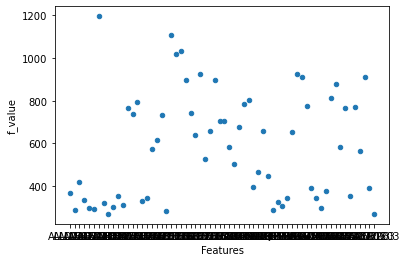

In [32]:
ax = plt.gca()
df_selected_features_from444.plot(kind='scatter',x='Features',y='f_value',ax=ax)
plt.show()

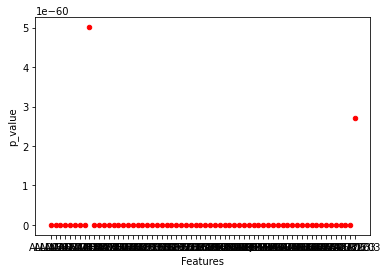

In [33]:
ax = plt.gca()

#df_selected_features.plot(kind='line',x='Features',y='f_value',ax=ax)
df_selected_features_from444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
plt.show()

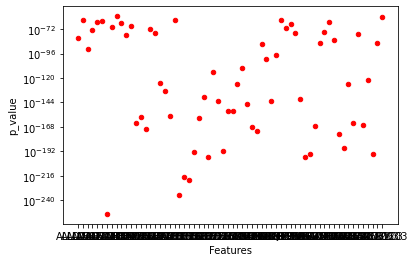

In [34]:
ax = plt.gca()

#df_selected_features.plot(kind='line',x='Features',y='f_value',ax=ax)
df_selected_features_from444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
plt.yscale('log')
plt.show()

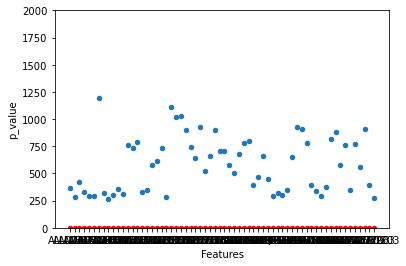

In [35]:
ax = plt.gca()

df_selected_features_from444.plot(kind='scatter',x='Features',y='f_value',ax=ax)
df_selected_features_from444.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
plt.ylim(1e-10,2e3)
plt.show()

#### visualize the p_values of the 64 features, we found that there are some outliers, and we continue on dropping these outlier features.

##### Ranking p_value in decending order, and drop the top features to decrease the number of outliers.

In [36]:
df_selected_features_from444.sort_values(by='p_value', ascending=False).head(50)

,Features,f_value,p_value
58,ALL8110,268.931557,5.008317e-60
437,TRTR1203,270.173490,2.708930e-60
146,BCA8155,284.502961,2.264210e-63
7,ALL0216,286.200447,9.783524e-64
177,BRC8158,288.186409,3.666003e-64
38,ALL6220,289.756664,1.687188e-64
361,RTA5030,296.207167,6.966593e-66
37,ALL6210,296.712633,5.427275e-66
69,ALL8172,299.261910,1.540753e-66
307,IQT9846,304.872119,9.651323e-68


In [76]:
 df_62features_from_ftest = df_selected_features_from444.drop([58,437])

In [90]:
features62 = np.array(df_62features_from_ftest["Features"])

In [117]:
features62

array(['ALL0000', 'ALL0216', 'ALL5020', 'ALL6120', 'ALL6210', 'ALL6220',
       'ALL7140', 'ALL7334', 'ALL8172', 'ALL8250', 'ALL8253', 'BAX0416',
       'BAX3510', 'BAX5020', 'BCA6200', 'BCA6210', 'BCA6220', 'BCA6280',
       'BCA7211', 'BCA8155', 'BCC0316', 'BCC1360', 'BCC5020', 'BCC5038',
       'BCC6160', 'BCC6200', 'BCC6280', 'BCC7117', 'BCC7160', 'BCC7216',
       'BCC7228', 'BCC7707', 'BCC7801', 'BRC0400', 'BRC2000', 'BRC2328',
       'BRC5038', 'BRC6160', 'BRC6280', 'BRC7160', 'BRC7190', 'BRC8158',
       'ILN7313', 'IQT9846', 'REV5036', 'REV6210', 'REV6220', 'REV6230',
       'REV7112', 'RTA0416', 'RTA2306', 'RTA5030', 'RTR3348', 'TBCA2263',
       'TBCA2264', 'TBCA2276', 'TBCA2277', 'TBCA2278', 'TBCA2601',
       'TBCA2606', 'TBCC1203', 'TBCC3203'], dtype=object)

In [118]:
df_features62 = df_credit[['portfolio_id', "product_term_credit_limit", "NP","cash_intent",
                           'ALL0000', 'ALL0216', 'ALL5020', 'ALL6120', 'ALL6210', 'ALL6220',
       'ALL7140', 'ALL7334', 'ALL8172', 'ALL8250', 'ALL8253', 'BAX0416',
       'BAX3510', 'BAX5020', 'BCA6200', 'BCA6210', 'BCA6220', 'BCA6280',
       'BCA7211', 'BCA8155', 'BCC0316', 'BCC1360', 'BCC5020', 'BCC5038',
       'BCC6160', 'BCC6200', 'BCC6280', 'BCC7117', 'BCC7160', 'BCC7216',
       'BCC7228', 'BCC7707', 'BCC7801', 'BRC0400', 'BRC2000', 'BRC2328',
       'BRC5038', 'BRC6160', 'BRC6280', 'BRC7160', 'BRC7190', 'BRC8158',
       'ILN7313', 'IQT9846', 'REV5036', 'REV6210', 'REV6220', 'REV6230',
       'REV7112', 'RTA0416', 'RTA2306', 'RTA5030', 'RTR3348', 'TBCA2263',
       'TBCA2264', 'TBCA2276', 'TBCA2277', 'TBCA2278', 'TBCA2601',
       'TBCA2606', 'TBCC1203', 'TBCC3203' ]]

In [120]:
df_features62

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALL0000,ALL0216,ALL5020,ALL6120,ALL6210,ALL6220,...,RTR3348,TBCA2263,TBCA2264,TBCA2276,TBCA2277,TBCA2278,TBCA2601,TBCA2606,TBCC1203,TBCC3203
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,13,7,49878,1,1,1,...,0.0,6.0,4.0,5.0,3.0,4.0,54.0,47.0,330.0,1448.0
2,1908,500,0,0,21,11,9146,1,1,1,...,0.0,0.0,2.0,0.0,1.0,97.0,-335.0,-60.0,-681.0,-655.0
3,1908,500,0,0,32,26,26012,1,1,1,...,0.0,2.0,5.0,2.0,0.0,1.0,215.0,406.0,1199.0,292.0
4,1908,500,0,0,39,0,999999997,0,994,400,...,0.0,97.0,97.0,97.0,97.0,97.0,999999997.0,999999997.0,999999997.0,999999997.0
5,1908,500,0,1,7,1,568,1,1,1,...,98.0,3.0,97.0,3.0,97.0,97.0,62.0,62.0,143.0,999999996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,2105,300,1,0,20,16,62349,1,994,1,...,98.0,98.0,98.0,98.0,98.0,98.0,999999998.0,999999998.0,999999998.0,999999998.0
19027,2105,300,1,1,9,7,15342,1,994,1,...,98.0,97.0,97.0,97.0,97.0,97.0,999999997.0,999999997.0,999999998.0,999999998.0
19028,2105,300,1,0,15,4,999999996,0,1,1,...,98.0,98.0,98.0,98.0,98.0,98.0,999999998.0,999999998.0,999999998.0,999999998.0


In [122]:
df_features62 ['portfolio_id'] = '20' + df_features62['portfolio_id'].astype(str)

<ipython-input-122-1c9fabe7b6a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features62 ['portfolio_id'] = '20' + df_features62['portfolio_id'].astype(str)


In [126]:

df_features62['portfolio_id'] = pd.to_datetime(df_features62['portfolio_id'], format='%Y%m')
df_features62

<ipython-input-126-c6511cb20048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features62['portfolio_id'] = pd.to_datetime(df_features62['portfolio_id'], format='%Y%m')


,portfolio_id,product_term_credit_limit,NP,cash_intent,ALL0000,ALL0216,ALL5020,ALL6120,ALL6210,ALL6220,...,RTR3348,TBCA2263,TBCA2264,TBCA2276,TBCA2277,TBCA2278,TBCA2601,TBCA2606,TBCC1203,TBCC3203
record_nb,,,,,,,,,,,,,,,,,,,,,
1,2019-08-01,500,0,0,13,7,49878,1,1,1,...,0.0,6.0,4.0,5.0,3.0,4.0,54.0,47.0,330.0,1448.0
2,2019-08-01,500,0,0,21,11,9146,1,1,1,...,0.0,0.0,2.0,0.0,1.0,97.0,-335.0,-60.0,-681.0,-655.0
3,2019-08-01,500,0,0,32,26,26012,1,1,1,...,0.0,2.0,5.0,2.0,0.0,1.0,215.0,406.0,1199.0,292.0
4,2019-08-01,500,0,0,39,0,999999997,0,994,400,...,0.0,97.0,97.0,97.0,97.0,97.0,999999997.0,999999997.0,999999997.0,999999997.0
5,2019-08-01,500,0,1,7,1,568,1,1,1,...,98.0,3.0,97.0,3.0,97.0,97.0,62.0,62.0,143.0,999999996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,2021-05-01,300,1,0,20,16,62349,1,994,1,...,98.0,98.0,98.0,98.0,98.0,98.0,999999998.0,999999998.0,999999998.0,999999998.0
19027,2021-05-01,300,1,1,9,7,15342,1,994,1,...,98.0,97.0,97.0,97.0,97.0,97.0,999999997.0,999999997.0,999999998.0,999999998.0
19028,2021-05-01,300,1,0,15,4,999999996,0,1,1,...,98.0,98.0,98.0,98.0,98.0,98.0,999999998.0,999999998.0,999999998.0,999999998.0


In [130]:
data_Ftest = df_features62.dropna()

In [133]:

data_Ftest.to_csv("Ftest_66features.csv")

## The Sencond method

### Select features with F-test

In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

In [38]:
dataset = df_new.values

In [39]:
X = dataset[:, 1:]
y = dataset[:,0]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
f_values, p_values = f_regression(X, y)

D:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [42]:
f_values

array([25.64561485, 33.27991258, 33.42388799, ...,  3.31576731,
        3.27998481,  3.27998503])

In [43]:
len(f_values)

2325

In [44]:
feature_names = np.array(df_new.drop(["NP"], axis = 1).columns)

In [45]:
feature_names

array(['ALJ0300', 'ALJ0316', 'ALJ0416', ..., 'TSTU4906', 'TSTU4907',
       'TSTU4908'], dtype=object)

In [46]:
len(feature_names)

2325

In [47]:
#for i in feature_names:
    #print (i)

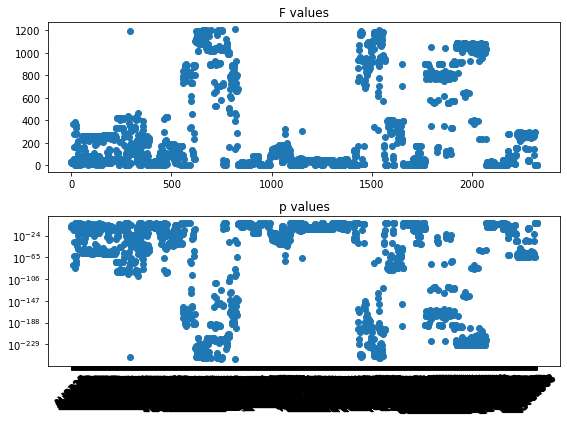

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(8,6))
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(feature_names, rotation=45);
fig.tight_layout()

In [49]:
p_values

array([4.14058654e-07, 8.10411505e-09, 7.52679241e-09, ...,
       6.86339803e-02, 7.01453425e-02, 7.01453328e-02])

In [50]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif

#### Build a new DataFrame, columns: features, f_value, and p_value

In [51]:
df_features = pd.DataFrame(data = feature_names, columns = ["Features"])

In [52]:
df_features["f_value"] = f_values
df_features ["p_value"] = p_values

In [53]:
df_features

,Features,f_value,p_value
0,ALJ0300,25.645615,4.140587e-07
1,ALJ0316,33.279913,8.104115e-09
2,ALJ0416,33.423888,7.526792e-09
3,ALJ5030,20.874491,4.934613e-06
4,ALJ5320,19.700636,9.108026e-06
...,...,...,...
2320,TSTU3907,3.279986,7.014528e-02
2321,TSTU3908,3.279986,7.014527e-02
2322,TSTU4906,3.315767,6.863398e-02
2323,TSTU4907,3.279985,7.014534e-02


##### Visualize all (2325) features' f_value and p_value, and looking for those with high f_value and low_p_value

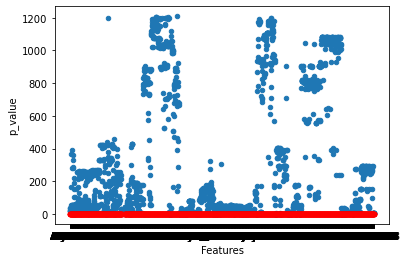

In [54]:
ax = plt.gca()

df_features.plot(kind='scatter',x='Features',y='f_value',ax=ax)
df_features.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
#plt.ylim(1e-10,2e3)
plt.show()

In [55]:
df_features.f_value.quantile(0.8)

817.744076999069

In [56]:
df_features.p_value.quantile(0.2)

3.94030717881509e-176

#### select top 4% features with highest f_value, and with the lowest p_value. Finally, we got 93 features.

In [57]:
df_selected_features = df_features[(df_features['f_value'] >= df_features.f_value.quantile(0.96)) & (df_features['p_value'] <= df_features.p_value.quantile(0.04))]

In [58]:
df_selected_features

,Features,f_value,p_value
293,ALL7140,1195.856963,3.413240e-254
623,BCC0400,1120.372723,9.936074e-239
624,BCC0416,1120.593835,8.950160e-239
625,BCC0436,1191.557107,2.585119e-253
626,BCC0437,1175.664012,4.615731e-250
...,...,...,...
1548,REV7438,1115.392544,1.046032e-237
1550,REV7442,1116.198514,7.146249e-238
1551,REV7443,1156.716515,3.502119e-246
1553,REV7447,1122.857731,3.070357e-239


#### visualize the f_values of the 93 features

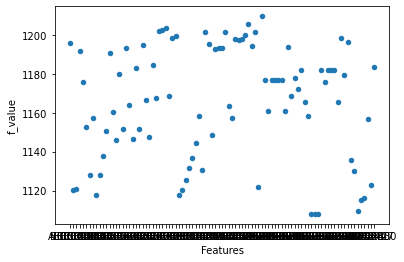

In [59]:
ax = plt.gca()
df_selected_features.plot(kind='scatter',x='Features',y='f_value',ax=ax)
plt.show()

#### visualize the p_values of the 93 features, we found that there are some outliers, and we continue on dropping these outlier features.

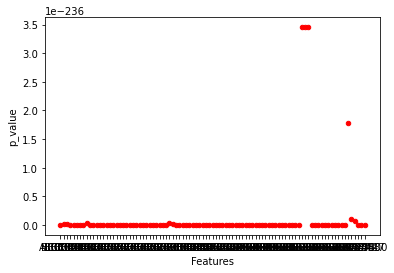

In [60]:
ax = plt.gca()

#df_selected_features.plot(kind='line',x='Features',y='f_value',ax=ax)
df_selected_features.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
plt.show()

##### See the log p_value of these 93 features

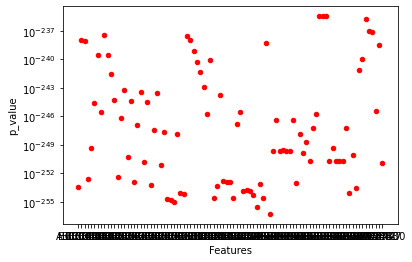

In [61]:
ax = plt.gca()

#df_selected_features.plot(kind='line',x='Features',y='f_value',ax=ax)
df_selected_features.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
plt.yscale('log')
plt.show()

##### Ranking p_value in decending order, and drop the top features to decrease the number of outliers.

In [62]:
df_selected_features.sort_values(by='p_value', ascending=False).head(50)

,Features,f_value,p_value
1516,REV5047,1107.996368,3.453859e-236
1514,REV5040,1107.996383,3.453833e-236
1515,REV5043,1107.996395,3.453814e-236
1547,REV7437,1109.401517,1.777142e-236
1548,REV7438,1115.392544,1.046032e-237
1550,REV7442,1116.198514,7.146249e-238
630,BCC1300,1117.785170,3.375631e-238
664,BCC3110,1117.906839,3.186976e-238
623,BCC0400,1120.372723,9.936074e-239
665,BCC3341,1120.429734,9.671924e-239


##### We selected 5 more features and drop them. And we finally get 87 features.

In [63]:
df_selected_features2 = df_selected_features.drop([1516,1514,1515, 1547, 1548, 1550])

In [64]:
len(df_selected_features2)

87

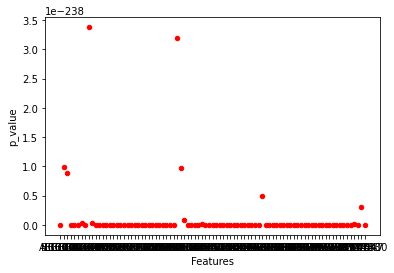

In [65]:
ax = plt.gca()

#df_selected_features.plot(kind='line',x='Features',y='f_value',ax=ax)
df_selected_features2.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
plt.show()

#### Visualize f_value and p_value of these 87 features. they are very clean now.

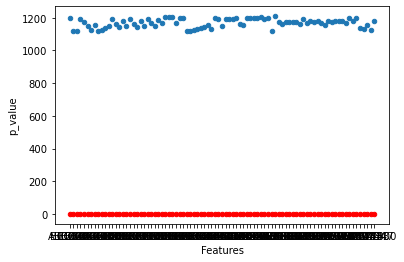

In [66]:
ax = plt.gca()

df_selected_features2.plot(kind='scatter',x='Features',y='f_value',ax=ax)
df_selected_features2.plot(kind='scatter',x='Features',y='p_value', color='red', ax=ax)
#plt.yscale('log')
#plt.ylim(1e-10,2e3)
plt.show()

### Build a new DataFrame which contains only the 87 selected features + "NP" + "cash_intent"

In [67]:
df = df_credit.copy().dropna()

In [68]:
df_87_features = df[df.columns[df.columns.isin(df_selected_features2["Features"])]]

In [69]:
df_87_features.shape

(19028, 87)

#### See the correlation matrix, not very good

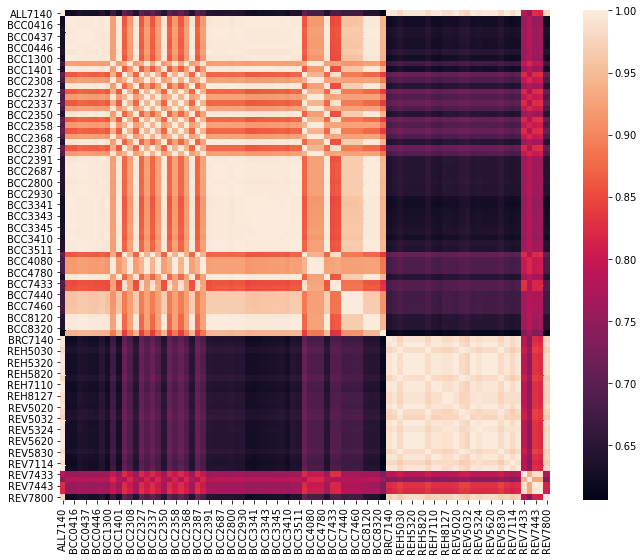

In [70]:
import seaborn as sns
#correlation matrix
corrval = df_87_features.corr()
visual = plt.figure(figsize = (12,9))

sns.heatmap(corrval,  vmax = 1, square = True)
plt.savefig("reduced_corr_graph.png")

#### Then we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [71]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [72]:
corr_features = correlation(df_87_features, 0.95)

In [73]:
len(set(corr_features))

80

#### Backward features elimination

In [139]:
X = df_87_features
y = df_new['NP']

In [140]:
X.shape, y.shape

((19028, 87), (19028,))

In [141]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [142]:
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=60, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [143]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   19.6s finished
Features: 86/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   18.1s finished
Features: 85/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   17.6s finished
Features: 84/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   17.2s finished
Features: 83/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   16.9s finished
Features: 82/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   16.3s finished
Features: 81/60[Par

In [144]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['BCC0400', 'BCC0416', 'BCC0436', 'BCC0437', 'BCC0438', 'BCC0446', 'BCC0700', 'BCC1300', 'BCC1401', 'BCC2308', 'BCC2320', 'BCC2327', 'BCC2328', 'BCC2337', 'BCC2350', 'BCC2357', 'BCC2358', 'BCC2367', 'BCC2368', 'BCC2380', 'BCC2387', 'BCC2388', 'BCC2607', 'BCC2688', 'BCC2800', 'BCC2900', 'BCC2930', 'BCC3110', 'BCC3341', 'BCC3342', 'BCC3343', 'BCC3344', 'BCC3345', 'BCC3410', 'BCC3511', 'BCC4070', 'BCC4080', 'BCC4380', 'BCC4780', 'BCC7440', 'BCC7460', 'BCC7470', 'BCC8320', 'BRC7140', 'REH5320', 'REH5420', 'REH5820', 'REH7110', 'REH7120', 'REH8127', 'REH8227', 'REV5320', 'REV5324', 'REV5420', 'REV5627', 'REV7110', 'REV7114', 'REV7433', 'REV7447', 'REV7800']


In [147]:
df_backward = df_credit[['portfolio_id', "product_term_credit_limit", "NP","cash_intent",'BCC0400', 'BCC0416', 'BCC0436', 'BCC0437', 'BCC0438', 'BCC0446', 'BCC0700', 'BCC1300', 'BCC1401', 'BCC2308', 'BCC2320', 'BCC2327', 'BCC2328', 'BCC2337', 'BCC2350', 'BCC2357', 'BCC2358', 'BCC2367', 'BCC2368', 'BCC2380', 'BCC2387', 'BCC2388', 'BCC2607', 'BCC2688', 'BCC2800', 'BCC2900', 'BCC2930', 'BCC3110', 'BCC3341', 'BCC3342', 'BCC3343', 'BCC3344', 'BCC3345', 'BCC3410', 'BCC3511', 'BCC4070', 'BCC4080', 'BCC4380', 'BCC4780', 'BCC7440', 'BCC7460', 'BCC7470', 'BCC8320', 'BRC7140', 'REH5320', 'REH5420', 'REH5820', 'REH7110', 'REH7120', 'REH8127', 'REH8227', 'REV5320', 'REV5324', 'REV5420', 'REV5627', 'REV7110', 'REV7114', 'REV7433', 'REV7447', 'REV7800']]

In [148]:
df_backward ['portfolio_id'] = '20' + df_backward['portfolio_id'].astype(str)
df_backward['portfolio_id'] = pd.to_datetime(df_backward['portfolio_id'], format='%Y%m')
df_backward

<ipython-input-148-2b92c592c047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backward ['portfolio_id'] = '20' + df_backward['portfolio_id'].astype(str)
<ipython-input-148-2b92c592c047>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_backward['portfolio_id'] = pd.to_datetime(df_backward['portfolio_id'], format='%Y%m')


,portfolio_id,product_term_credit_limit,NP,cash_intent,BCC0400,BCC0416,BCC0436,BCC0437,BCC0438,BCC0446,...,REH8227,REV5320,REV5324,REV5420,REV5627,REV7110,REV7114,REV7433,REV7447,REV7800
record_nb,,,,,,,,,,,,,,,,,,,,,
1,2019-08-01,500,0,0,2,2,0,1,1,2,...,39,10600.0,10600.0,5600.0,2813.0,76.0,76.0,100.0,0.0,2.0
2,2019-08-01,500,0,0,4,4,1,2,3,3,...,85,3250.0,3250.0,1000.0,2217.0,32.0,34.0,100.0,0.0,4.0
3,2019-08-01,500,0,0,15,15,3,6,12,12,...,36,17440.0,17440.0,1500.0,6991.0,60.0,60.0,100.0,0.0,6.0
4,2019-08-01,500,0,0,0,0,0,0,0,0,...,9996,999999997.0,999999996.0,999999997.0,999999997.0,997.0,996.0,0.0,33.0,999999997.0
5,2019-08-01,500,0,1,1,1,0,1,1,1,...,8,600.0,600.0,600.0,32.0,95.0,95.0,100.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19026,2021-05-01,300,1,0,98,98,98,98,98,98,...,9998,999999998.0,999999998.0,999999998.0,999999998.0,998.0,998.0,998.0,998.0,999999998.0
19027,2021-05-01,300,1,1,98,98,98,98,98,98,...,9996,999999996.0,999999996.0,999999996.0,999999996.0,996.0,996.0,0.0,0.0,999999996.0
19028,2021-05-01,300,1,0,98,98,98,98,98,98,...,9998,999999998.0,999999998.0,999999998.0,999999998.0,998.0,998.0,998.0,998.0,999999998.0


In [149]:
data_backward = df_backward.dropna()


In [150]:
data_backward.to_csv("Backward_elimination_64features.csv")